<a href="https://colab.research.google.com/github/daxausername/ab_tests/blob/main/%D0%BD%D0%B8%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

## Научно-исследовательская работа
### Жаркова Д.В.

[Данные](https://www.kaggle.com/datasets/sergylog/ab-test-data?resource=download) для примера проведения A/B тестирования взяты с сайта Kaggle

 *Описание предоставленное автором:

Сайт запустил A/B-тест с целью увеличения дохода. Файл Excel содержит необработанные данные о результатах эксперимента (user_id), типе выборки (variant_name) и доходе, принесенном пользователем (revenue). Задача — проанализировать результаты эксперимента и написать свои рекомендации.*

In [ ]:
ab_control = pd.read_csv('/content/control_group.csv', sep = ';')
ab_test = pd.read_csv('/content/test_group.csv', sep = ';')

EDA - разведовачный анализ данных. На этом этапе нам необходимо поработать с видом данных, посмотреть на распределения значений, рассмотреть есть ли нулевые значения, пропуски и что они нам говорят в контексте наших данных, можно ли их удалить или необходимо заменить на среднее.

In [ ]:
ab_control.head(5)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ab_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [ ]:
ab_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


Заменим названия столбцов

In [ ]:
ab_control.columns = ["Campaign Name", "Date", "Amount Spent",
                        "Number of Impressions", "Reach", "Website Clicks",
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

ab_test.columns = ["Campaign Name", "Date", "Amount Spent",
                        "Number of Impressions", "Reach", "Website Clicks",
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

ab_control['Date'] = pd.to_datetime(ab_control['Date'], format='%d.%m.%Y')
ab_test['Date'] = pd.to_datetime(ab_test['Date'], format='%d.%m.%Y')

ab_test.dtypes

Campaign Name                    object
Date                     datetime64[ns]
Amount Spent                      int64
Number of Impressions             int64
Reach                             int64
Website Clicks                    int64
Searches Received                 int64
Content Viewed                    int64
Added to Cart                     int64
Purchases                         int64
dtype: object

В контрольном наборе данных есть нулвые значения, так как всего у нас 30 наблюдений в датасете, то нулевые значения можно заменть на среднее, чтобы не терять наблюдение. При этом если мы взглянем на таблицу данных, то увидим, что сами значения все пропущены в одной строчке. Следовательно можно также удалить строку в обоих наборах данных

In [ ]:
ab_control

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,2019-08-05,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Control Campaign,2019-08-06,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,2019-08-07,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,2019-08-08,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,2019-08-09,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,2019-08-10,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0


In [ ]:
ab_control.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64

In [ ]:
ab_control["Number of Impressions"].fillna(value=ab_control["Number of Impressions"].mean(),
                                             inplace=True)
ab_control["Reach"].fillna(value=ab_control["Reach"].mean(),
                             inplace=True)
ab_control["Website Clicks"].fillna(value=ab_control["Website Clicks"].mean(),
                                      inplace=True)
ab_control["Searches Received"].fillna(value=ab_control["Searches Received"].mean(),
                                         inplace=True)
ab_control["Content Viewed"].fillna(value=ab_control["Content Viewed"].mean(),
                                      inplace=True)
ab_control["Added to Cart"].fillna(value=ab_control["Added to Cart"].mean(),
                                     inplace=True)
ab_control["Purchases"].fillna(value=ab_control["Purchases"].mean(),
                                 inplace=True)

In [ ]:
ab_test.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64

In [ ]:
ab_control.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64

In [ ]:
ab =  pd.concat([ab_test, ab_control], ignore_index=True)

In [ ]:
ab.groupby('Campaign Name').describe()

Amount Spent                                           \
                        count         mean         std     min     25%   
Campaign Name                                                            
Control Campaign         30.0  2288.433333  367.334451  1757.0  1945.5   
Test Campaign            30.0  2563.066667  348.687681  1968.0  2324.5   

                                          Number of Impressions  \
                     50%      75%     max                 count   
Campaign Name                                                     
Control Campaign  2299.5  2532.00  3083.0                  30.0   
Test Campaign     2584.0  2836.25  3112.0                  30.0   

                                 ... Added to Cart         Purchases  \
                           mean  ...           75%     max     count   
Campaign Name                    ...                                   
Control Campaign  109559.758621  ...        1638.0  1913.0      30.0   
Test Campaign      74584.800000  ...        1148.5  1391.0      30.0   

                                                                              
                        mean         std    min    25%    50%     75%    max  
Campaign Name                                                                 
Control Campaign  522.793103  181.810508  222.0  375.5  506.0  663.25  800.0  
Test Campaign     521.233333  211.047745  238.0  298.0  500.0  701.00  890.0  

[2 rows x 64 columns]

У нас уже представлен набор данных, но все равно нобходимо понять а хватит ли количества наблюдений, чтобы увидеть статистически значимые результаты. Контрольная группа (A) и тестовая (B), нам нужно выявить статистическую значимость между запущенной рекламной компанией. Мы можем рассчитать необходимое количество наблюдений в выборке, которые нам нужны, чтобы наш эксперимент имел достаточную статистическую мощность, а также значимость.



> Эти два показателя отвечают за вероятность возникновения ошибки первого и второго рода


*   Уровень значимости возьмем базовым:   α=0.05
*   Также с мощностью теста:  β=0.2


  

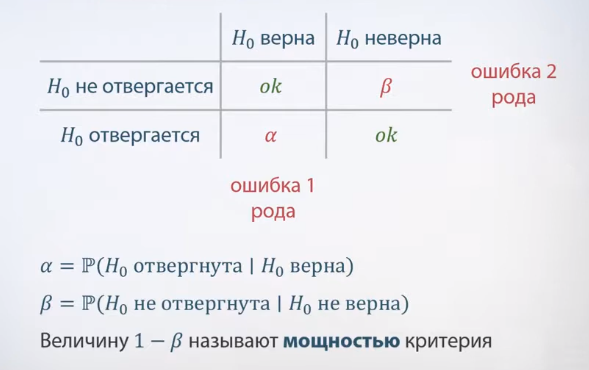

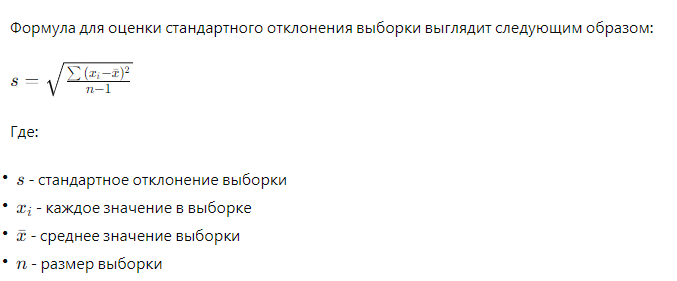

In [ ]:
max(ab['Date'])-min(ab['Date'])

Timedelta('29 days 00:00:00')

<Axes: xlabel='Date', ylabel='Purchases'>

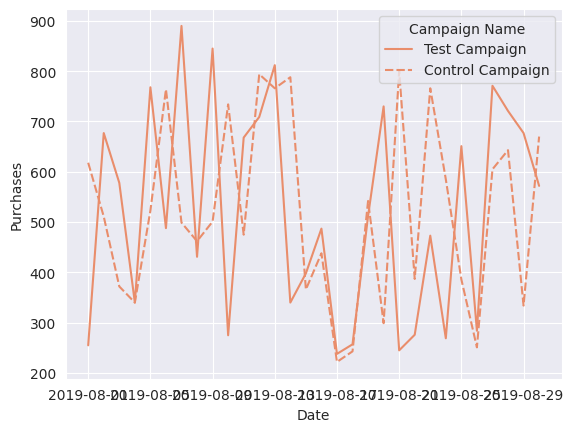

In [ ]:
sns.lineplot(ab, x = 'Date', y = 'Purchases', style = 'Campaign Name', )

In [ ]:
ab_test['Purchases'].sum()

15637

In [ ]:
conversion_Purchases = ab_control['Purchases'].sum()/ab_control['Content Viewed'].sum()* 100
print("Конверсия покупки по просмотрам контента равна:", round(conversion_Purchases, 3),'%')

Конверсия покупки по просмотрам контента равна: 26.896 %


Но сначала рассмотрим данные на наличие выбросов через визуализацию и статистические критерии.

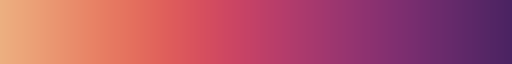

In [ ]:
sns.set_style("darkgrid")
sns.set_palette("flare")
sns.color_palette("flare", as_cmap=True)

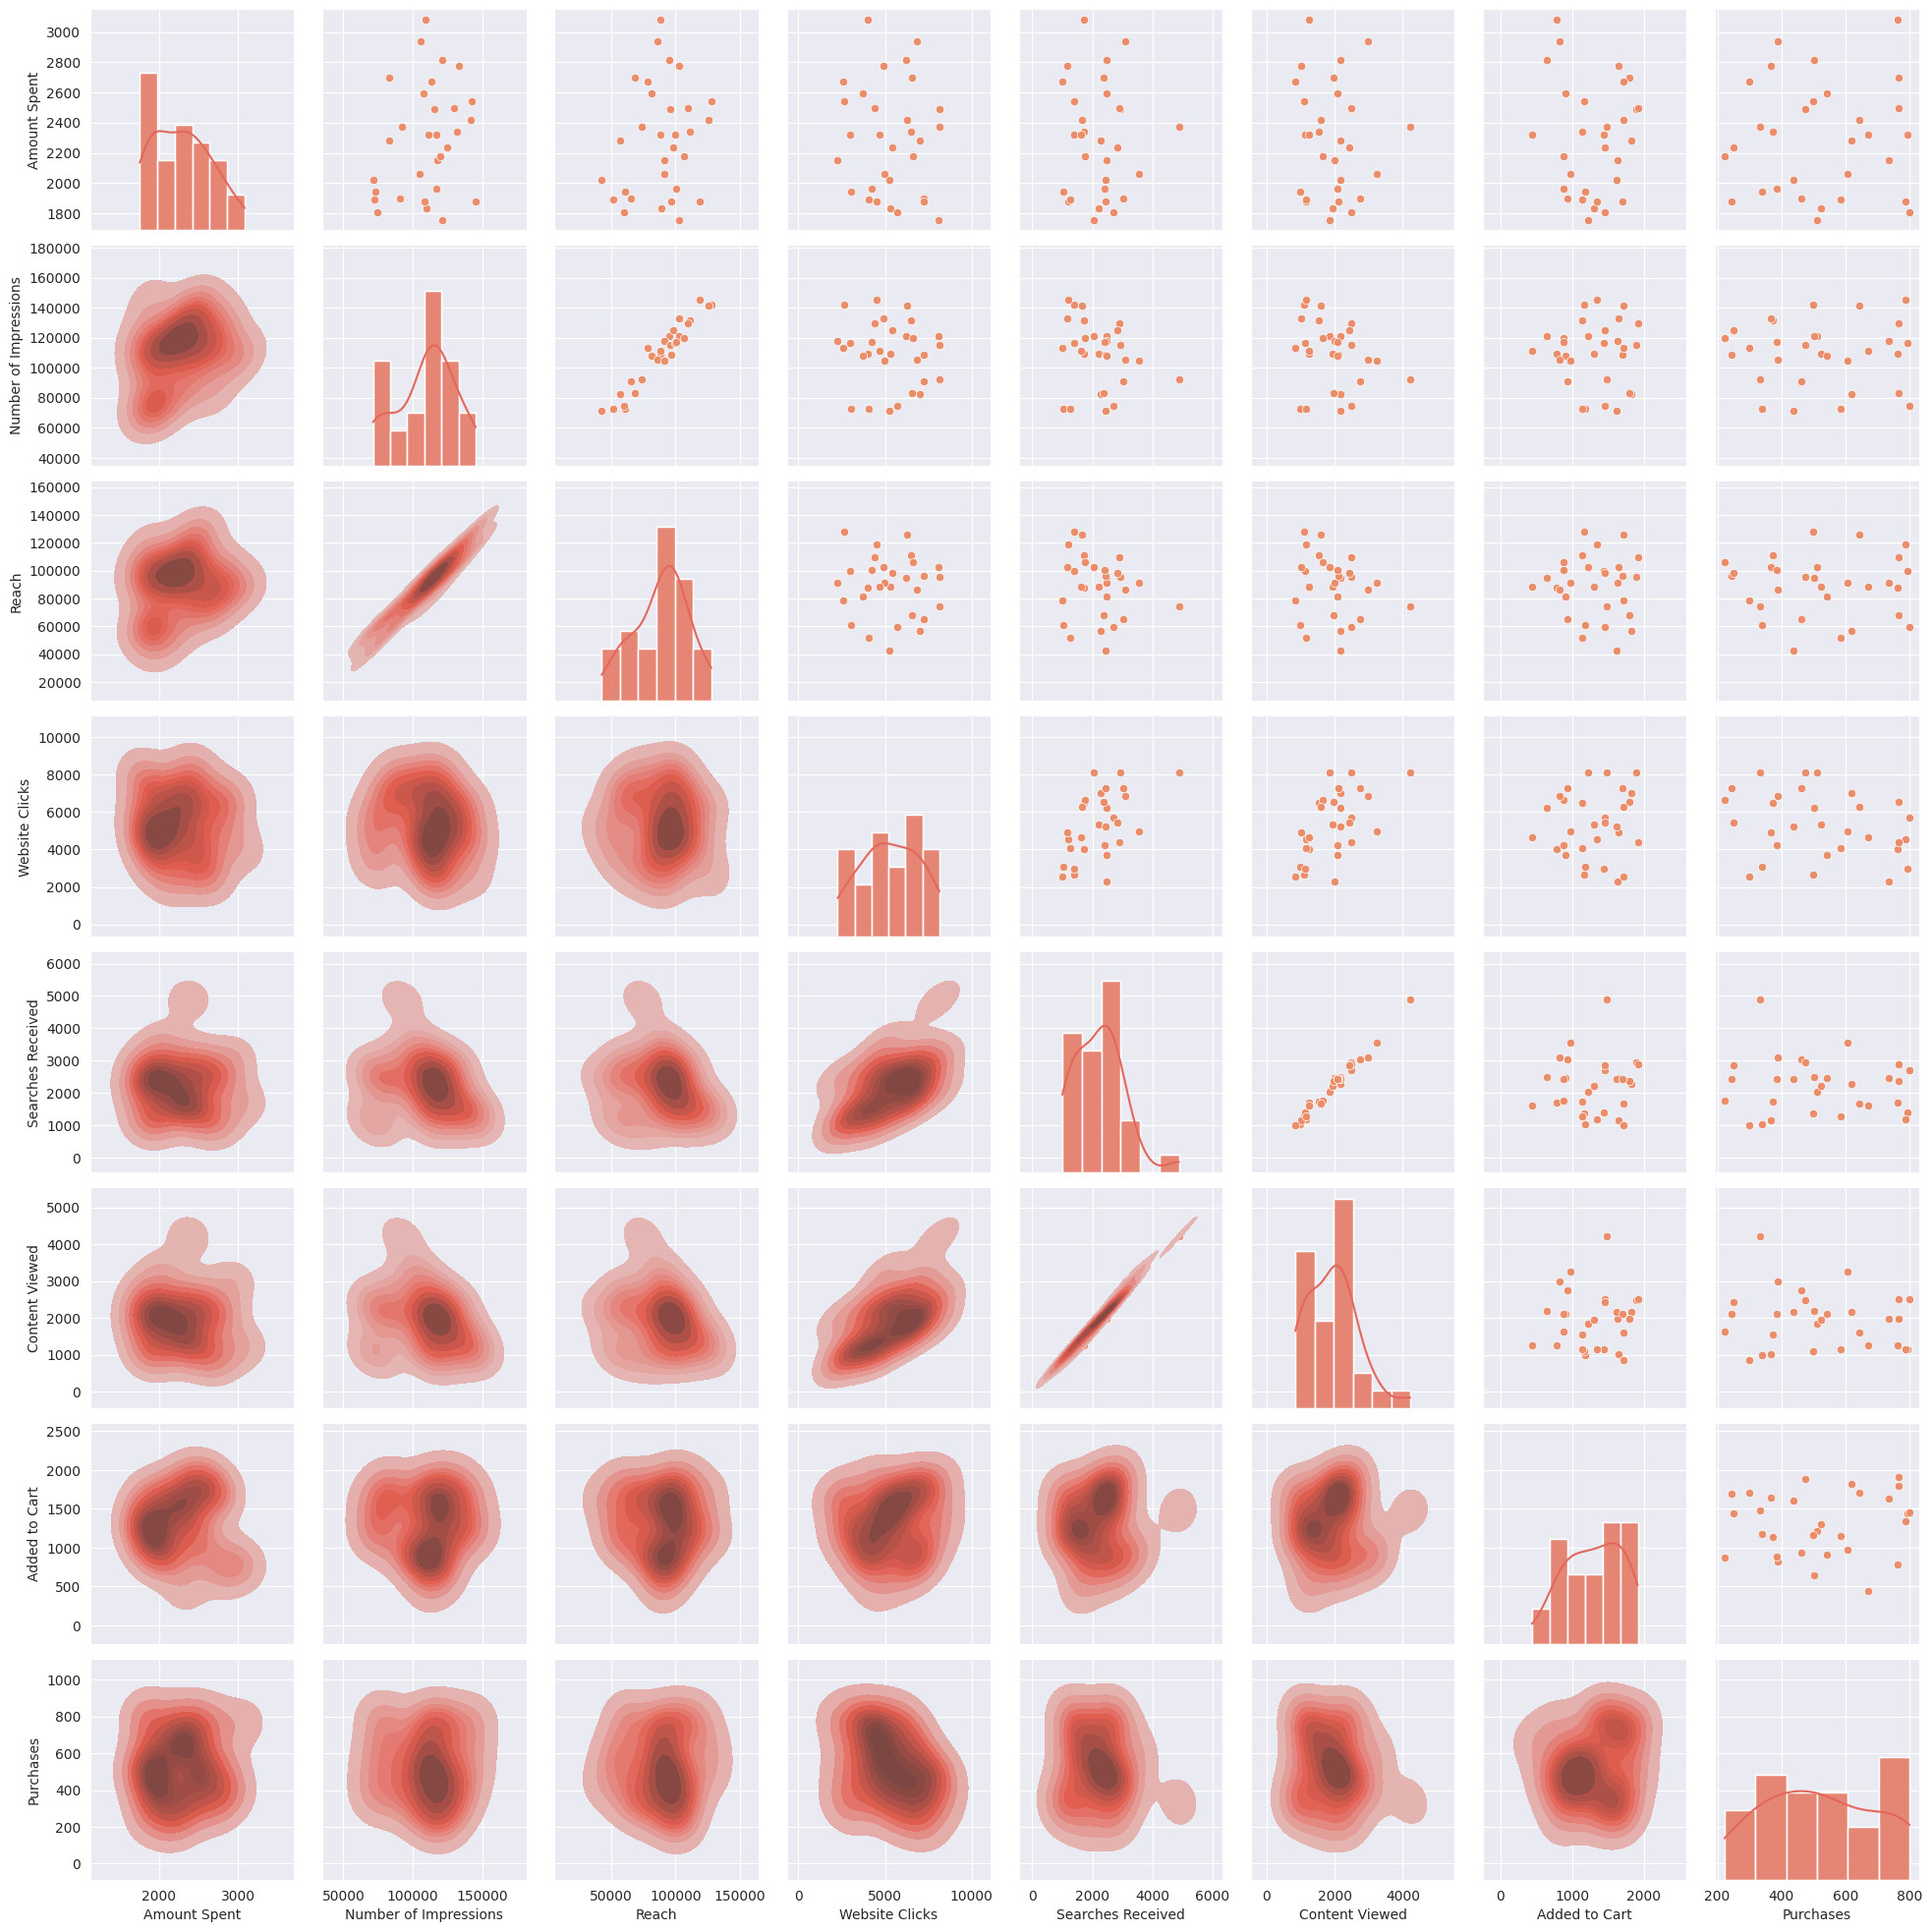

In [ ]:
c = sns.pairplot(ab_control)
c.map_lower(sns.kdeplot, fill=True)
c.map_diag(sns.histplot, kde=True)

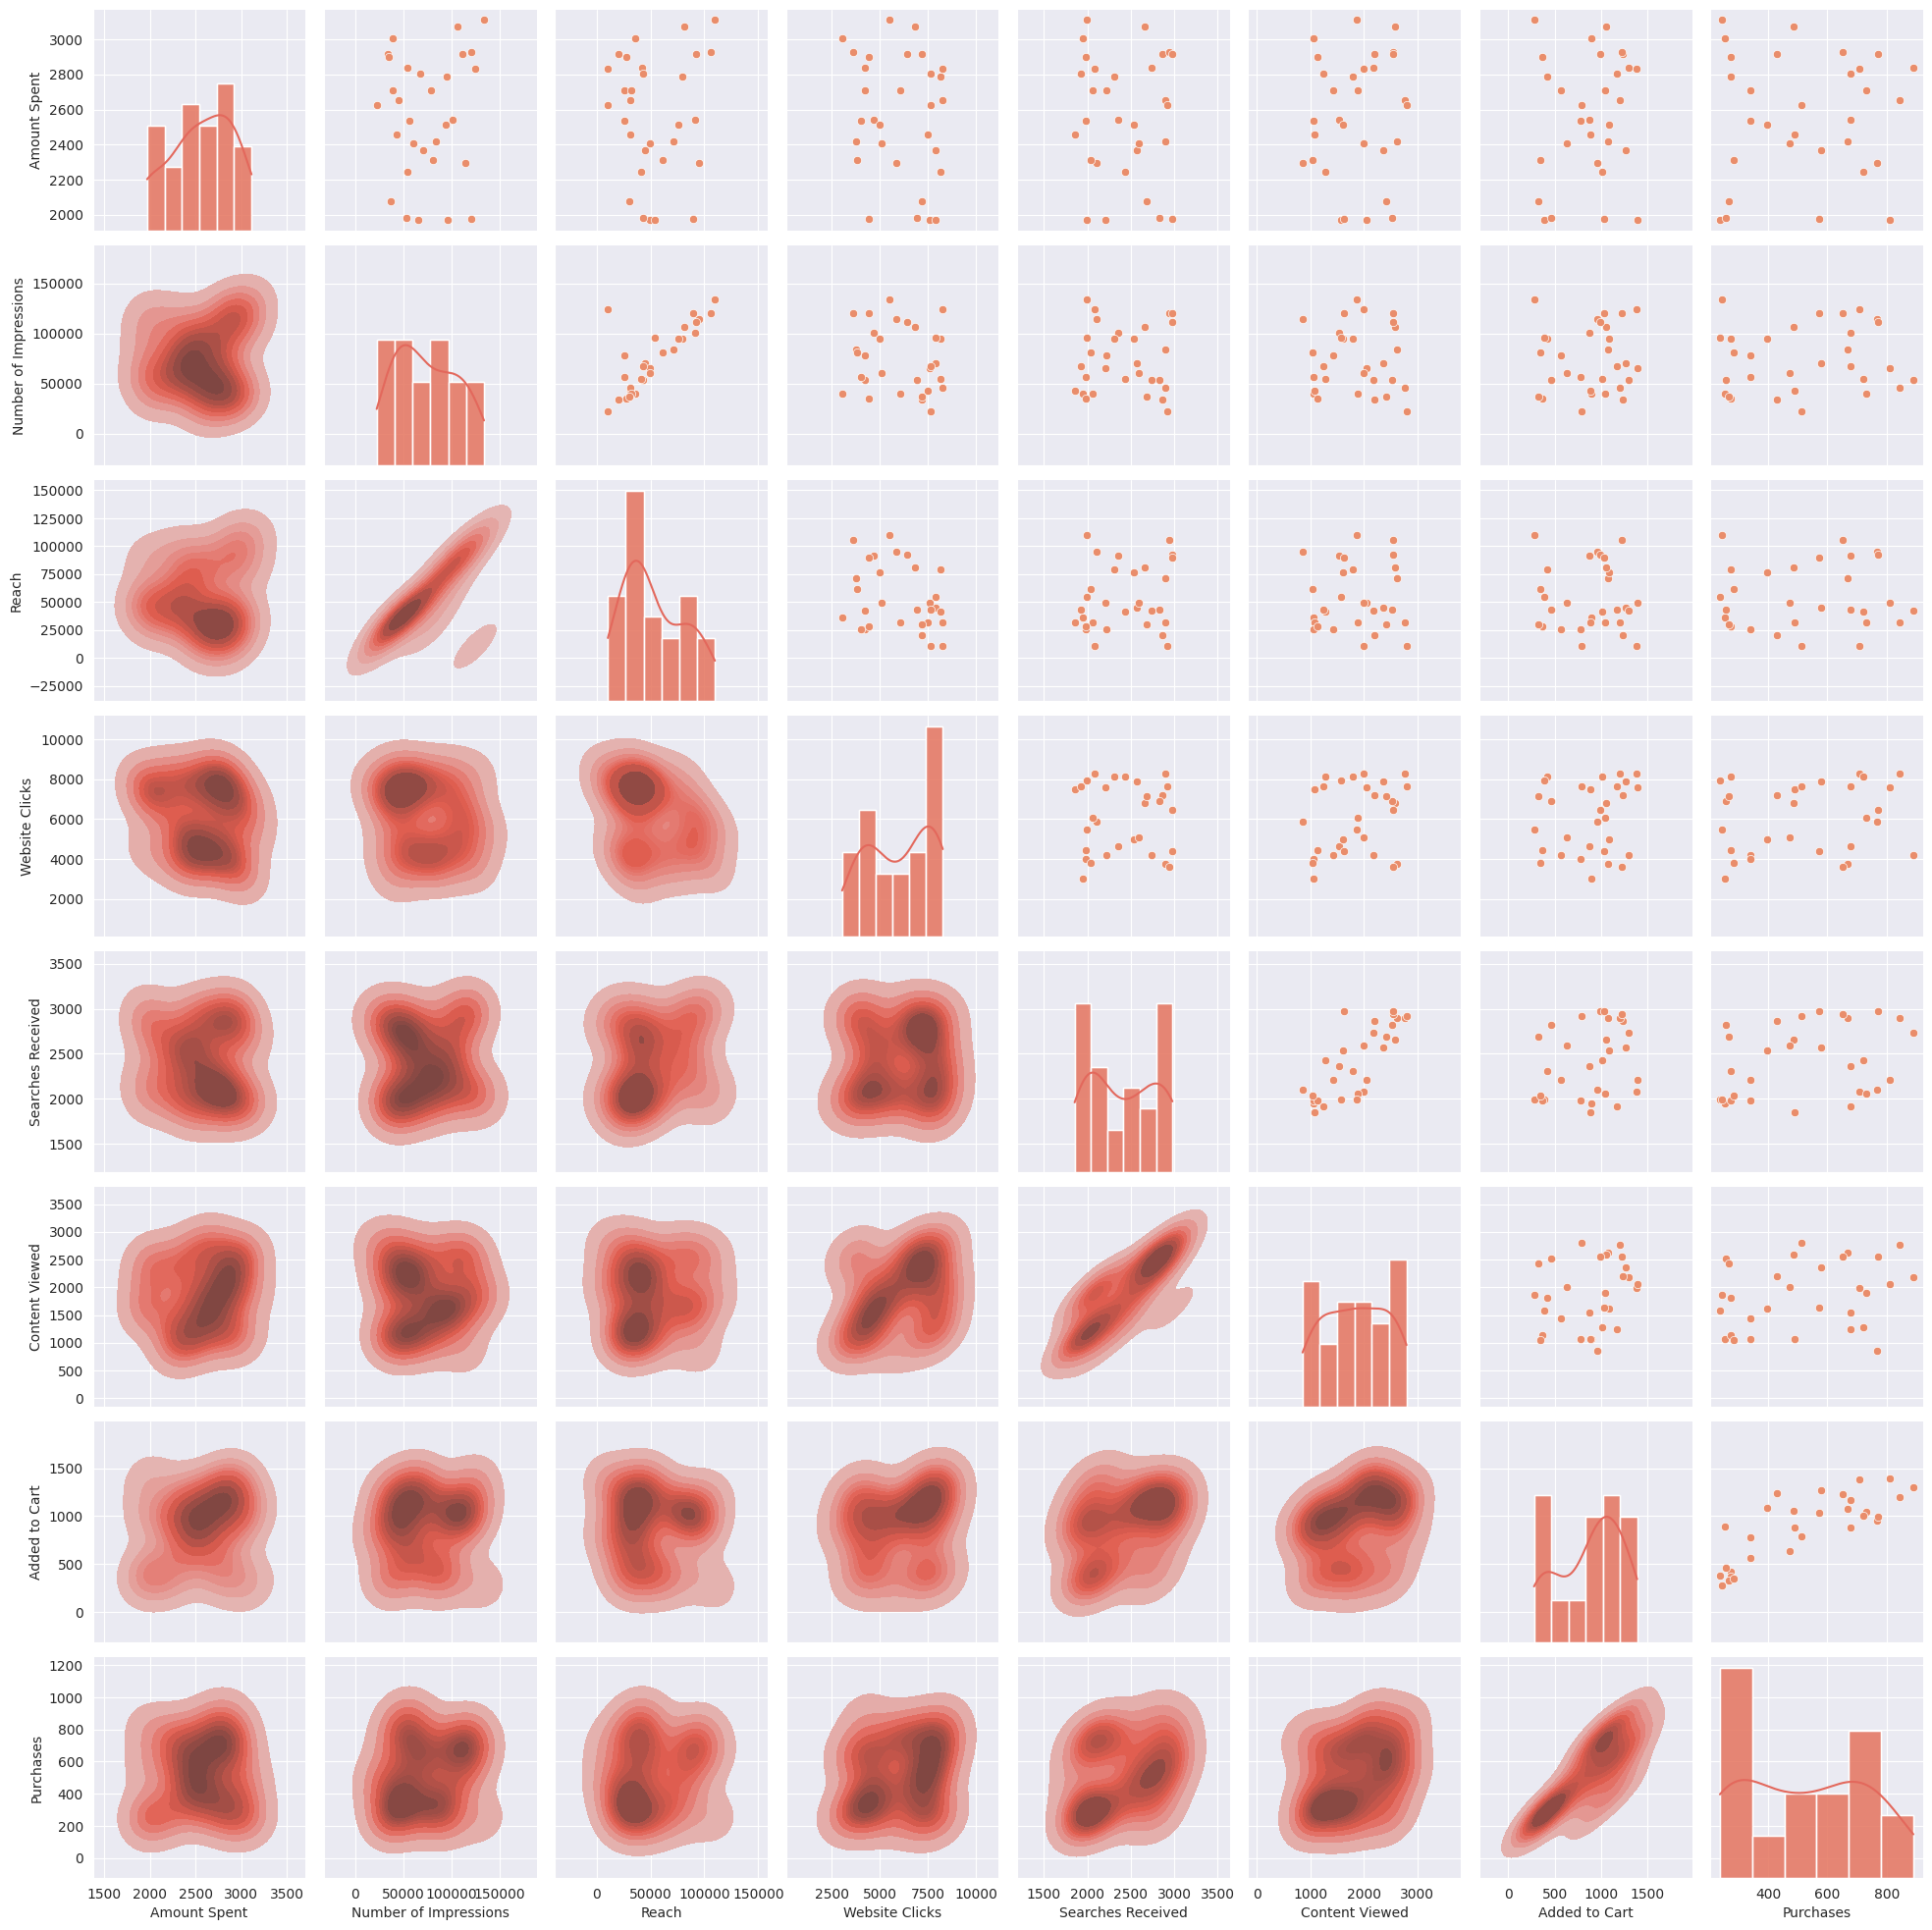

In [ ]:
t = sns.pairplot(ab_test)
t.map_lower(sns.kdeplot, fill=True)
t.map_diag(sns.histplot, kde=True)

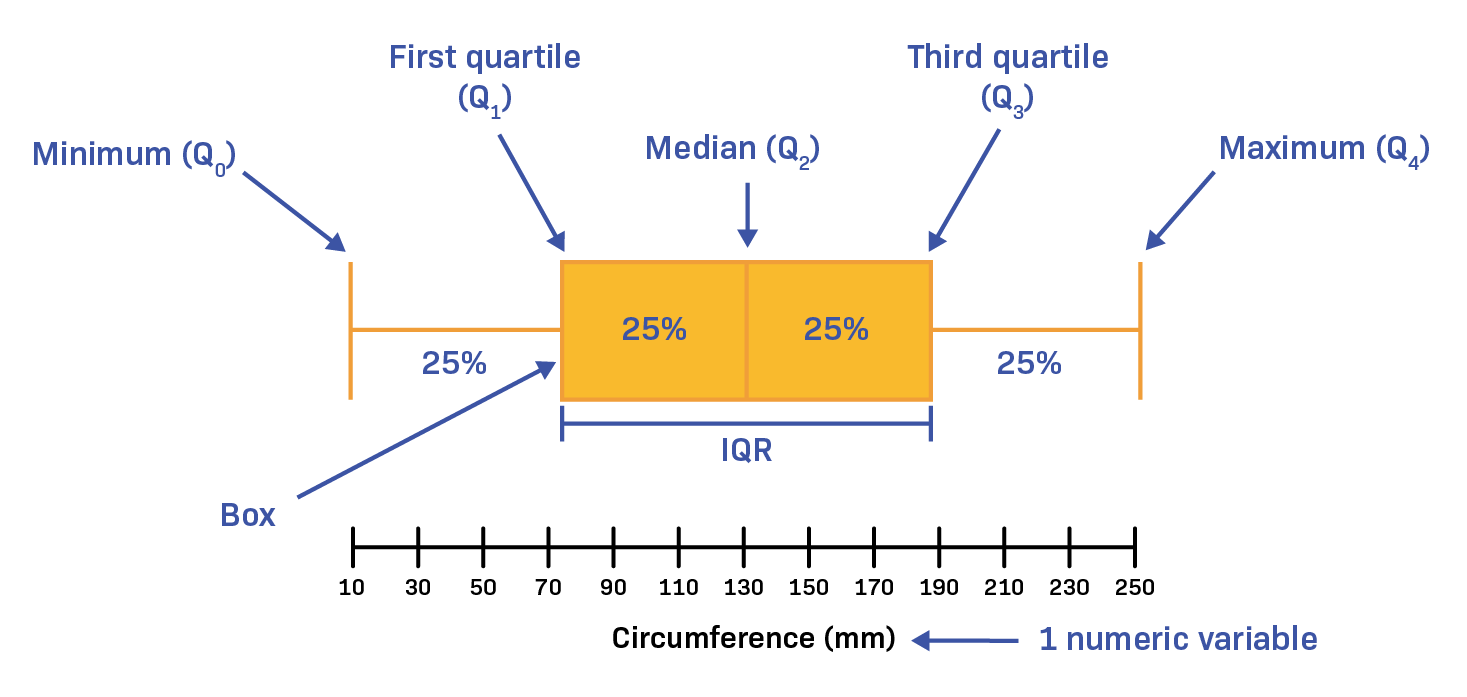

квартили - это значения ранжированного ряда, которые находятся на расстоянии одной четвертой на пути от наименьшего и наибольшего значений.

<Axes: xlabel='Amount Spent', ylabel='Campaign Name'>

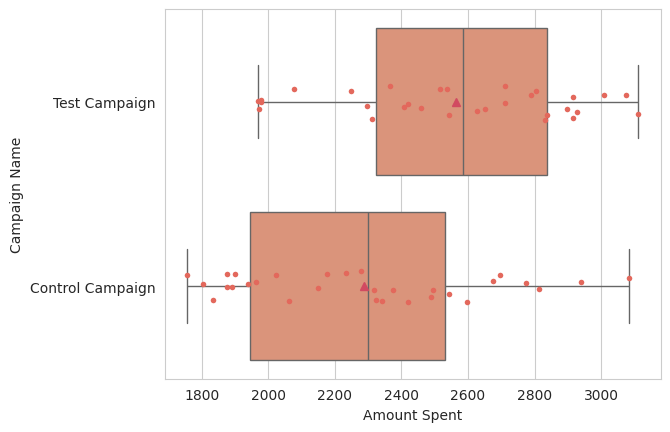

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(ab, x="Amount Spent", y ='Campaign Name' , showmeans=True)
sns.stripplot(ab, x="Amount Spent", y='Campaign Name', size=4)



<Axes: xlabel='Number of Impressions', ylabel='Campaign Name'>

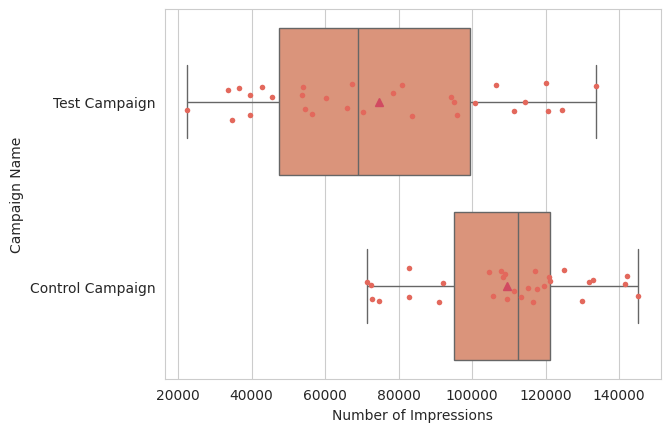

In [ ]:
sns.boxplot(ab, x="Number of Impressions", y = 'Campaign Name' , showmeans=True)
sns.stripplot(ab, x="Number of Impressions", y="Campaign Name", size=4)

<Axes: xlabel='Reach', ylabel='Campaign Name'>

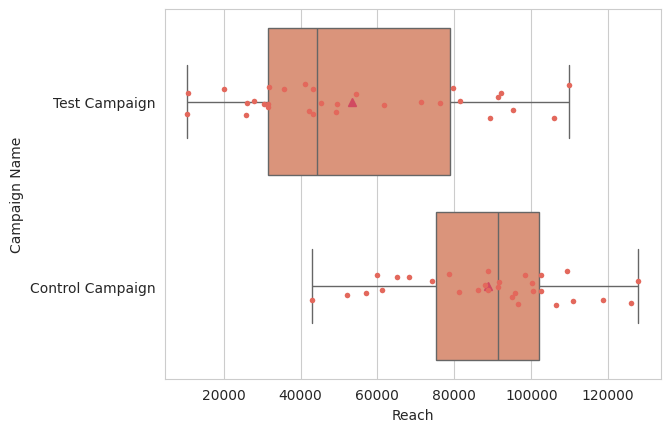

In [ ]:
sns.boxplot(ab, x="Reach", y = 'Campaign Name' , showmeans=True)
sns.stripplot(ab, x="Reach", y="Campaign Name", size=4)

<Axes: xlabel='Website Clicks', ylabel='Campaign Name'>

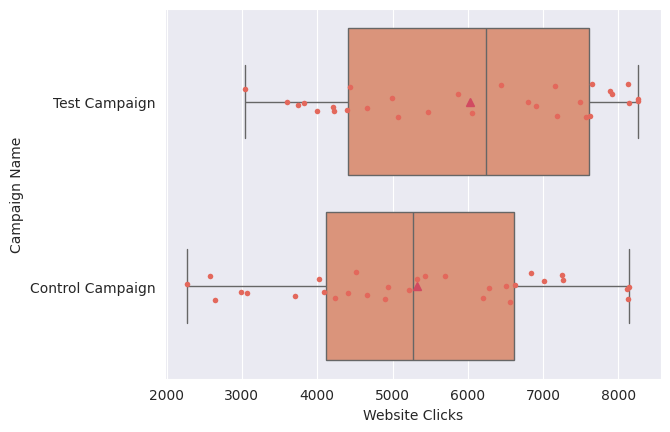

In [ ]:
sns.boxplot(ab, x="Website Clicks", y = 'Campaign Name' , showmeans=True)
sns.stripplot(ab, x="Website Clicks", y="Campaign Name", size=4)

Searches Received - Количество пользователей, выполнявших поиск на сайте

Что тестовая выборка имеет биноманиальное распредедление, а на контрольной выборке можно увидеть что есть выбросы в данных.

<Axes: xlabel='Searches Received', ylabel='Campaign Name'>

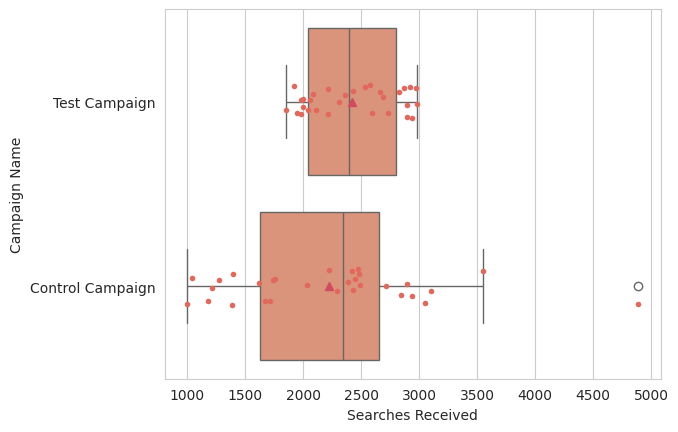

In [ ]:
sns.boxplot(ab, x="Searches Received", y = 'Campaign Name' , showmeans=True)
sns.stripplot(ab, x="Searches Received", y="Campaign Name", size=4)

<Axes: xlabel='Searches Received', ylabel='Frequency'>

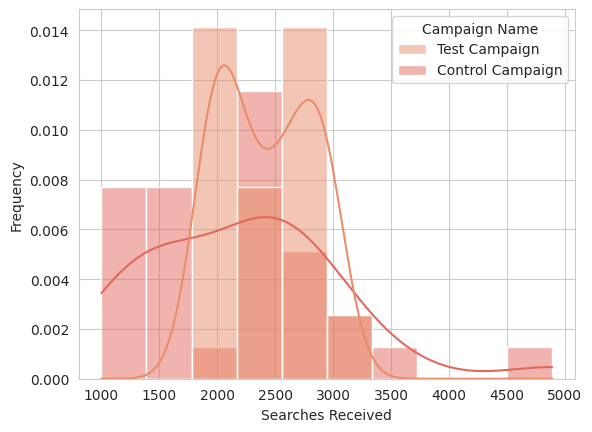

In [ ]:
sns.histplot(ab, x='Searches Received', hue = 'Campaign Name', stat='frequency', kde = True)

Проверим гипотезу о нормальном распределении, когда у нас есть бимодальное распределение и когда есть выбросы, потом скорректируем данные и проверим еще раз

нулевая гипотеза теста Шапиро-Уилка состоит в том, что данные были взяты из генеральной совокупности с нормальным распределением. Альтернативная гипотеза заключается в том, что данные не имеют нормального распределения. Тест Шапиро-Уилка вычисляет статистику, основанную на коэффициентах регрессии, чтобы оценить отклонение данных от нормальности.

In [ ]:
from scipy import stats


In [ ]:
res, p_val = stats.shapiro(ab_test['Searches Received'])
print("Значение критерия", res,'\t', 'Значение p-value', p_val)

if p_val < 0.05:
    print("существует статистически значимое доказательство против нулевой гипотезы. То есть, есть основания отвергнуть предположение о том, что данные имеют нормальное распределение.")
else:
    print("нет статистически значимых доказательств против нулевой гипотезы. В этом случае нельзя отвергнуть предположение о нормальном распределении данных.")

Значение критерия 0.8963550925254822 	 Значение p-value 0.006847961340099573
существует статистически значимое доказательство против нулевой гипотезы. То есть, есть основания отвергнуть предположение о том, что данные имеют нормальное распределение.


In [ ]:
res, p_val = stats.shapiro(ab_control['Searches Received'])
print(res, '\t', p_val)

if p_val < 0.05:
    print("существует статистически значимое доказательство против нулевой гипотезы. То есть, есть основания отвергнуть предположение о том, что данные имеют нормальное распределение.")
else:
    print("нет статистически значимых доказательств против нулевой гипотезы. В этом случае нельзя отвергнуть предположение о нормальном распределении данных.")

0.9614096879959106 	 0.33640187978744507
нет статистически значимых доказательств против нулевой гипотезы. В этом случае нельзя отвергнуть предположение о нормальном распределении данных.


In [ ]:
ab_test['Searches Received_log'] = ab_test['Searches Received'].apply(lambda x: np.log(x))

z_scores = np.abs((ab_control['Searches Received'] - ab_control['Searches Received'].mean()) / ab_control['Searches Received'].std())

outliers = ab_control[z_scores > 3]

print('количество выбросов в столбце равно: ', len(outliers))

ab_control.loc[z_scores > 3, 'Searches Received'] = ab_control['Searches Received'].mean()

количество выбросов в столбце равно:  1


<Axes: xlabel='Searches Received_log', ylabel='Frequency'>

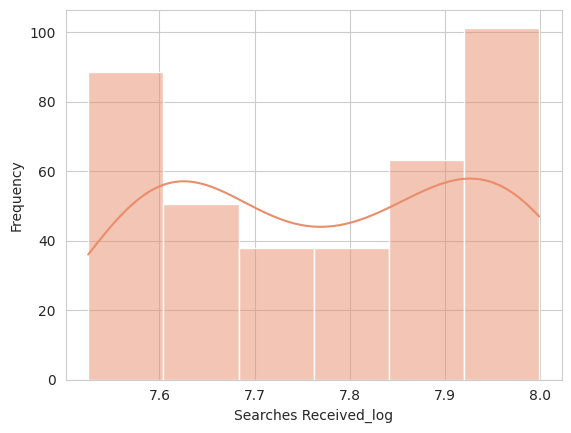

In [ ]:
sns.histplot(ab_test, x='Searches Received_log', stat='frequency', kde = True)



In [ ]:
res, p_val = stats.shapiro(ab_test['Searches Received_log'])
print(res, '\t', p_val)

if p_val < 0.05:
    print("существует статистически значимое доказательство против нулевой гипотезы. То есть, есть основания отвергнуть предположение о том, что данные имеют нормальное распределение.")
else:
    print("нет статистически значимых доказательств против нулевой гипотезы. В этом случае нельзя отвергнуть предположение о нормальном распределении данных.")

0.8990229964256287 	 0.007949652150273323
существует статистически значимое доказательство против нулевой гипотезы. То есть, есть основания отвергнуть предположение о том, что данные имеют нормальное распределение.


<Axes: xlabel='Searches Received', ylabel='Frequency'>

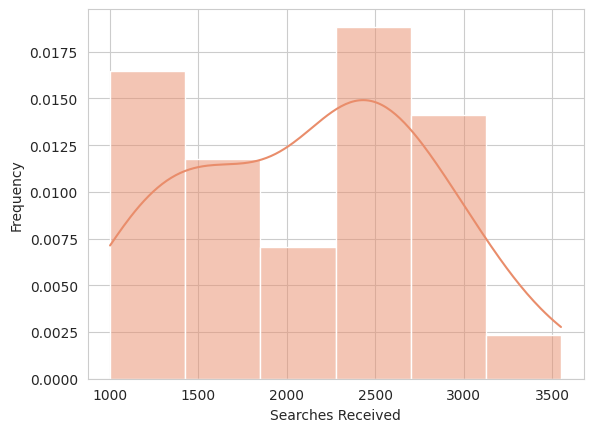

In [ ]:
sns.histplot(ab_control, x='Searches Received', stat='frequency', kde = True)

In [ ]:
res, p_val = stats.shapiro(ab_control['Searches Received'])
print(res, '\t', p_val)

if p_val < 0.05:
    print("существует статистически значимое доказательство против нулевой гипотезы. То есть, есть основания отвергнуть предположение о том, что данные имеют нормальное распределение.")
else:
    print("нет статистически значимых доказательств против нулевой гипотезы. В этом случае нельзя отвергнуть предположение о нормальном распределении данных.")

0.9614096879959106 	 0.33640187978744507
нет статистически значимых доказательств против нулевой гипотезы. В этом случае нельзя отвергнуть предположение о нормальном распределении данных.


Выводы следующие:

в тестовой группе по показателю поиска на сайте данные по тесту Шапиро_уилка не имеют нормального распределение или статистическая разница не может доказать обратного. При этом после применения логарифмирования к столбцу результатыт теста сохраняются. Так как при дальнейшем сравнении двух групп (рекламных компаний) нам понадобиться посмотреть есть ли статистически значимая разница между ними, можно использзоать непараметрические методы.


Например, критерий Манна-Уитни (непараметрический t-тест): Используется для сравнения средних значений двух независимых выборок. Этот тест проверяет нулевую гипотезу о том, что распределения двух выборок одинаковы против альтернативной гипотезы о том, что распределения различны.

<Axes: xlabel='Content Viewed', ylabel='Campaign Name'>

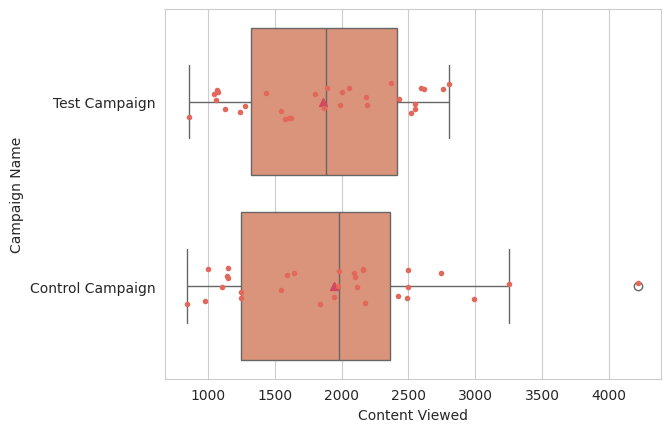

In [ ]:
sns.boxplot(ab, x="Content Viewed", y = 'Campaign Name' , showmeans=True)
sns.stripplot(ab, x="Content Viewed", y="Campaign Name", size=4)

Content Viewed - Количество пользователей, просмотревших контент и товары на сайте. В контрольной группе есть выброс и также это видно на гистограмме. Применим к этому столбцу также тест Шапиро_Уилка и удостоверимся что распределение является нормальным.

<Axes: xlabel='Content Viewed', ylabel='Frequency'>

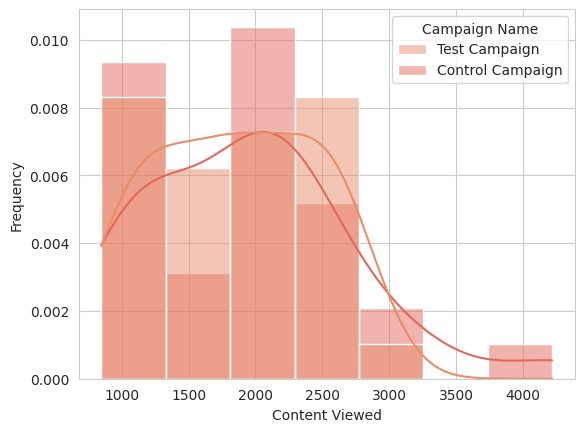

In [ ]:
sns.histplot(ab, x='Content Viewed', hue = 'Campaign Name', stat='frequency', kde = True)

In [ ]:
res, p_val = stats.shapiro(ab_test['Content Viewed'])
print(res, '\t', p_val)

if p_val < 0.05:
    print("существует статистически значимое доказательство против нулевой гипотезы. То есть, есть основания отвергнуть предположение о том, что данные имеют нормальное распределение.")
else:
    print("нет статистически значимых доказательств против нулевой гипотезы. В этом случае нельзя отвергнуть предположение о нормальном распределении данных.")

0.9403281211853027 	 0.09282878786325455
нет статистически значимых доказательств против нулевой гипотезы. В этом случае нельзя отвергнуть предположение о нормальном распределении данных.


In [ ]:
res, p_val = stats.shapiro(ab_control['Content Viewed'])
print(res, '\t', p_val)

if p_val < 0.05:
    print("существует статистически значимое доказательство против нулевой гипотезы. То есть, есть основания отвергнуть предположение о том, что данные имеют нормальное распределение.")
else:
    print("нет статистически значимых доказательств против нулевой гипотезы. В этом случае нельзя отвергнуть предположение о нормальном распределении данных.")

0.934613823890686 	 0.06518712639808655
нет статистически значимых доказательств против нулевой гипотезы. В этом случае нельзя отвергнуть предположение о нормальном распределении данных.


Рассчитаем Z-score для переменной

In [ ]:
z_scores = np.abs((ab_control['Content Viewed'] - ab_control['Content Viewed'].mean()) / ab_control['Content Viewed'].std())

outliers = ab_control[z_scores > 3]

print('количество выбросов в столбце равно: ', len(outliers))

ab_control.loc[z_scores > 3, 'Content Viewed'] = ab_control['Content Viewed'].mean()

количество выбросов в столбце равно:  0


Так как Z-score показало, что выбросов на основе порогового значения равного - 3 нет, то найдем выбросы по интерквариальному размаху, потому что там значение IQR считается для конкретного набора данных (переменной)

In [ ]:
Q1 = np.percentile(ab_control['Content Viewed'], 25, interpolation = 'midpoint')
Q2 = np.percentile(ab_control['Content Viewed'], 50, interpolation = 'midpoint')
Q3 = np.percentile(ab_control['Content Viewed'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('нижний порог равен', low_lim)
print('верхний порог равен', up_lim)
outlier =[]
for x in ab_control['Content Viewed']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print('Значения выбросов в данных', outlier)


ab_control.loc[(ab_control['Content Viewed'] < low_lim) | (ab_control['Content Viewed'] > up_lim), 'Content Viewed'] = ab_control['Content Viewed'].mean()

нижний порог равен -327.5
верхний порог равен 3876.5
Значения выбросов в данных [4219.0]


<Axes: xlabel='Content Viewed'>

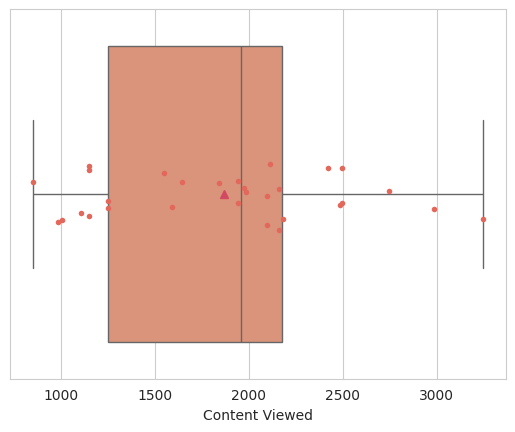

In [ ]:
sns.boxplot(ab_control, x="Content Viewed", showmeans=True)
sns.stripplot(ab_control, x = 'Content Viewed', size=4)

In [ ]:
res, p_val = stats.shapiro(ab_control['Content Viewed'])
print(res, '\t', p_val)

if p_val < 0.05:
    print("существует статистически значимое доказательство против нулевой гипотезы. То есть, есть основания отвергнуть предположение о том, что данные имеют нормальное распределение.")
else:
    print("нет статистически значимых доказательств против нулевой гипотезы. В этом случае нельзя отвергнуть предположение о нормальном распределении данных.")

0.9582380056381226 	 0.27906492352485657
нет статистически значимых доказательств против нулевой гипотезы. В этом случае нельзя отвергнуть предположение о нормальном распределении данных.


В обоих вариантах тестов при существовании у удалении выбросов нулевая гипотеза о нормальности распределения не отвергается, но сами значения статитстики, конечно, меняются и в этом плане непонятно может выброс в данных повлияет на сравнение двух выборок контрольной и тестовой групп. Поэтому работа с выбросами должна вестись аккуратно и в моем наборе данных не так много значений, что удаление или усреднее значений может тоже вызвать неправильную интерпретацию

<Axes: xlabel='Added to Cart', ylabel='Campaign Name'>

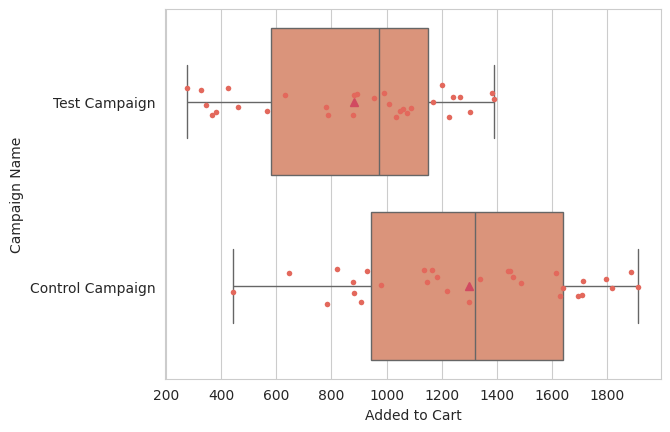

In [ ]:
sns.boxplot(ab, x="Added to Cart", y = 'Campaign Name' , showmeans=True)
sns.stripplot(ab, x="Added to Cart", y="Campaign Name", size=4)

<Axes: xlabel='Purchases', ylabel='Campaign Name'>

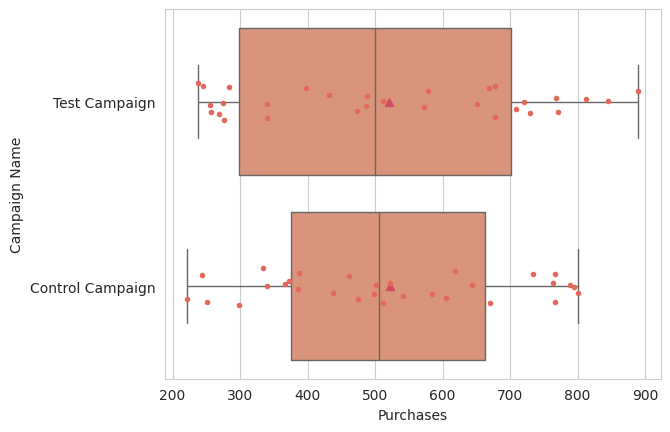

In [ ]:
sns.boxplot(ab, x="Purchases", y = 'Campaign Name' , showmeans=True)
sns.stripplot(ab, x="Purchases", y="Campaign Name", size=4)

In [ ]:
ab_change =  pd.concat([ab_test, ab_control], ignore_index=True)
ab_change.head()

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases,Searches Received_log
0,Test Campaign,2019-08-01,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0,7.573531
1,Test Campaign,2019-08-02,2542,100719.0,91236.0,4657.0,2359.0,1548.0,879.0,677.0,7.765993
2,Test Campaign,2019-08-03,2365,70263.0,45198.0,7885.0,2572.0,2367.0,1268.0,578.0,7.852439
3,Test Campaign,2019-08-04,2710,78451.0,25937.0,4216.0,2216.0,1437.0,566.0,340.0,7.703459
4,Test Campaign,2019-08-05,2297,114295.0,95138.0,5863.0,2106.0,858.0,956.0,768.0,7.652546


In [ ]:
ab.groupby('Campaign Name')[['Searches Received', 'Content Viewed']].describe()

Searches Received                                            \
                             count         mean         std     min      25%   
Campaign Name                                                                  
Control Campaign              30.0  2221.310345  851.025795  1001.0  1629.25   
Test Campaign                 30.0  2418.966667  388.742312  1854.0  2043.00   

                                          Content Viewed               \
                     50%      75%     max          count         mean   
Campaign Name                                                           
Control Campaign  2340.0  2655.00  4891.0           30.0  1943.793103   
Test Campaign     2395.5  2801.25  2978.0           30.0  1858.000000   

                                                                     
                         std    min     25%     50%     75%     max  
Campaign Name                                                        
Control Campaign  764.021907  848.0  1249.0  1979.5  2360.5  4219.0  
Test Campaign     597.654669  858.0  1320.0  1881.0  2412.0  2801.0

In [ ]:
ab_change.groupby('Campaign Name')[['Searches Received','Content Viewed']].describe()

Searches Received                                            \
                             count         mean         std     min      25%   
Campaign Name                                                                  
Control Campaign              30.0  2132.320690  685.773779  1001.0  1629.25   
Test Campaign                 30.0  2418.966667  388.742312  1854.0  2043.00   

                                               Content Viewed               \
                          50%      75%     max          count         mean   
Campaign Name                                                                
Control Campaign  2255.655172  2486.00  3549.0           30.0  1867.952874   
Test Campaign     2395.500000  2801.25  2978.0           30.0  1858.000000   

                                                                          
                         std    min     25%          50%     75%     max  
Campaign Name                                                             
Control Campaign  631.883777  848.0  1249.0  1959.396552  2174.0  3249.0  
Test Campaign     597.654669  858.0  1320.0  1881.000000  2412.0  2801.0

In [ ]:
ab_change['CTR'] = (ab_change['Website Clicks'] / ab_change['Number of Impressions']) * 100
ab_change['Conversion Rate'] = (ab_change['Purchases'] / ab_change['Website Clicks']) * 100
ab_change['CPC'] = ab_change['Amount Spent'] / ab_change['Website Clicks']
ab_change[['Campaign Name', 'CTR', 'Conversion Rate','CPC']].head()


,Campaign Name,CTR,Conversion Rate,CPC
0,Test Campaign,7.681416,8.393680,0.990125
1,Test Campaign,4.623755,14.537256,0.545845
2,Test Campaign,11.222123,7.330374,0.299937
3,Test Campaign,5.374055,8.064516,0.642789
4,Test Campaign,5.129708,13.099096,0.391779


In [ ]:
ab_change.groupby('Campaign Name')[['CTR', 'Conversion Rate', 'CPC']].sum()

,CTR,Conversion Rate,CPC
Campaign Name,,,
Control Campaign,152.636777,342.664367,14.697202
Test Campaign,307.267789,276.935451,14.061535


In [ ]:
ab_change.groupby('Campaign Name')[['Website Clicks', 'Number of Impressions', 'Purchases']].sum()

,Website Clicks,Number of Impressions,Purchases
Campaign Name,,,
Control Campaign,159623.793103,3.286793e+06,15683.793103
Test Campaign,180970.000000,2.237544e+06,15637.000000


<Axes: xlabel='CTR', ylabel='Frequency'>

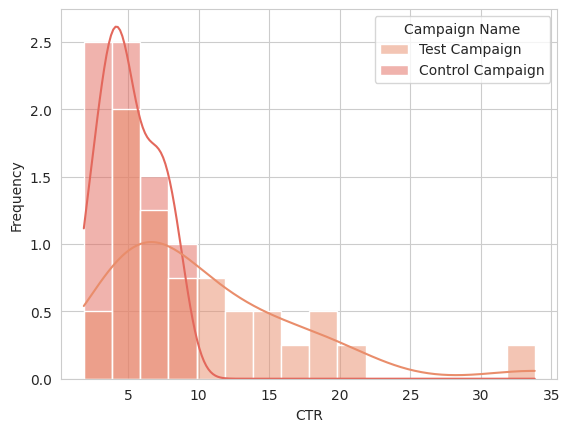

In [ ]:
sns.histplot(ab_change, x='CTR', hue = 'Campaign Name', stat='frequency', kde = True)

In [ ]:
res, p_val = stats.shapiro(ab_change['CTR'])
print(res, '\t', p_val)

if p_val < 0.05:
    print("существует статистически значимое доказательство против нулевой гипотезы. То есть, есть основания отвергнуть предположение о том, что данные имеют нормальное распределение.")
else:
    print("нет статистически значимых доказательств против нулевой гипотезы. В этом случае нельзя отвергнуть предположение о нормальном распределении данных.")

0.7670426368713379 	 2.2244496022949534e-08
существует статистически значимое доказательство против нулевой гипотезы. То есть, есть основания отвергнуть предположение о том, что данные имеют нормальное распределение.


<Axes: xlabel='CTR_log', ylabel='Frequency'>

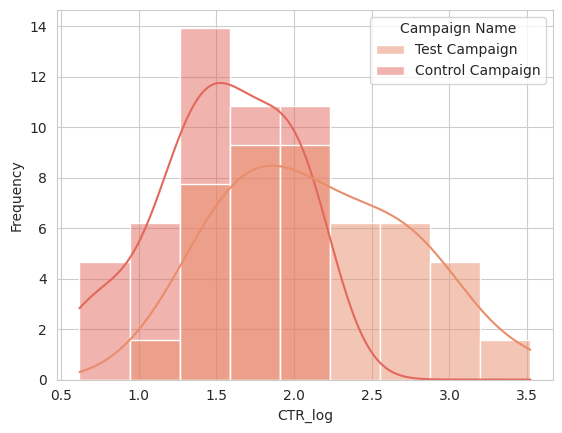

In [ ]:
ab_change['CTR_log'] = ab_change['CTR'].apply(lambda x: np.log(x))
sns.histplot(ab_change, x='CTR_log', hue = 'Campaign Name', stat='frequency', kde = True)

In [ ]:
res, p_val = stats.shapiro(ab_change['CTR_log'])
print(res, '\t', p_val)

if p_val < 0.05:
    print("существует статистически значимое доказательство против нулевой гипотезы. То есть, есть основания отвергнуть предположение о том, что данные имеют нормальное распределение.")
else:
    print("нет статистически значимых доказательств против нулевой гипотезы. В этом случае нельзя отвергнуть предположение о нормальном распределении данных.")

0.9812623858451843 	 0.48421818017959595
нет статистически значимых доказательств против нулевой гипотезы. В этом случае нельзя отвергнуть предположение о нормальном распределении данных.


In [ ]:
t_stat, p_value = stats.ttest_ind(ab_change['CTR_log'].loc[ab_change['Campaign Name'] == 'Control Campaign'], ab_change['CTR_log'].loc[ab_change['Campaign Name'] == 'Test Campaign'])
print("p value : {}".format(p_value))

if p_value < 0.05:
    print("Тестовая группа превосходит по значению средних Контрольную группу")
    print("Существуют значительные различия чтобы отвергнуть нулевую гипотезу")
else:
    print("Существенной разницы между тестовой и контрольной группами нет. Нельзя отвергнуть нулевую гипотезу")

p value : 3.304366233707844e-05
Тестовая группа превосходит по значению средних Контрольную группу
Существуют значительные различия чтобы отвергнуть нулевую гипотезу


In [ ]:
from scipy.stats import mannwhitneyu
statistic, p_value = mannwhitneyu(ab_change['CTR'].loc[ab_change['Campaign Name'] == 'Control Campaign'], ab_change['CTR'].loc[ab_change['Campaign Name'] == 'Test Campaign'])
print("Статистика U =", statistic)
print("p-значение =", p_value)
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: есть статистически значимая разница между группами.")
else:
    print("Не отвергаем нулевую гипотезу: нет статистически значимой разницы между группами.")

Статистика U = 199.0
p-значение = 0.00021264638274527632
Отвергаем нулевую гипотезу: есть статистически значимая разница между группами.


<Axes: xlabel='Conversion Rate', ylabel='Frequency'>

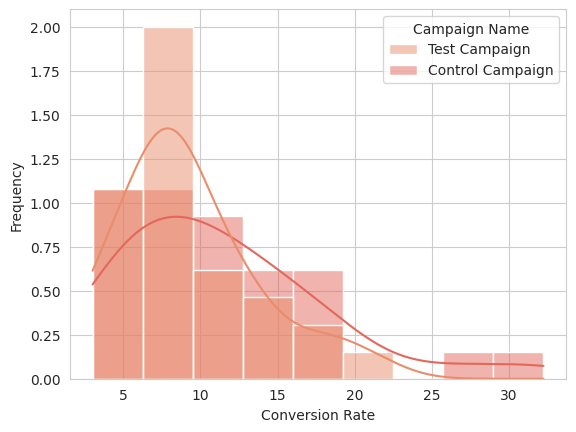

In [ ]:
sns.histplot(ab_change, x='Conversion Rate', hue = 'Campaign Name', stat='frequency', kde = True)

In [ ]:
res, p_val = stats.shapiro(ab_change['Conversion Rate'])
print("p value : {}".format(p_value))

if p_val < 0.05:
    print("существует статистически значимое доказательство против нулевой гипотезы. То есть, есть основания отвергнуть предположение о том, что данные имеют нормальное распределение.")
else:
    print("нет статистически значимых доказательств против нулевой гипотезы. В этом случае нельзя отвергнуть предположение о нормальном распределении данных.")

p value : 0.00021264638274527632
существует статистически значимое доказательство против нулевой гипотезы. То есть, есть основания отвергнуть предположение о том, что данные имеют нормальное распределение.


In [ ]:
statistic, p_value = mannwhitneyu(ab_change['Conversion Rate'].loc[ab_change['Campaign Name'] == 'Control Campaign'], ab_change['Conversion Rate'].loc[ab_change['Campaign Name'] == 'Test Campaign'])
print("Статистика U =", statistic)
print("p-значение =", p_value)
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: есть статистически значимая разница между группами.")
else:
    print("Не отвергаем нулевую гипотезу: нет статистически значимой разницы между группами.")

Статистика U = 523.0
p-значение = 0.2837780479456242
Не отвергаем нулевую гипотезу: нет статистически значимой разницы между группами.


<Axes: xlabel='Conversion Rate_log', ylabel='Frequency'>

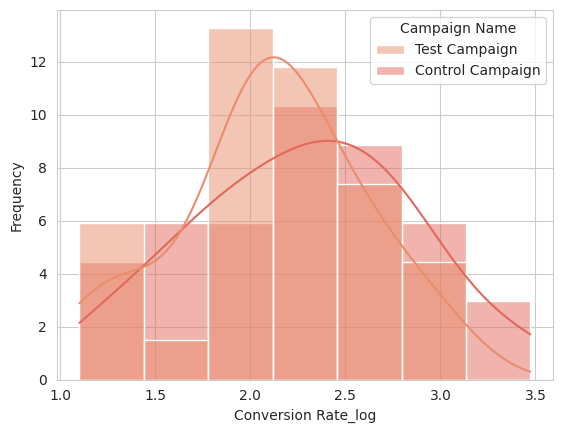

In [ ]:
ab_change['Conversion Rate_log'] = ab_change['Conversion Rate'].apply(lambda x: np.log(x))
sns.histplot(ab_change, x='Conversion Rate_log', hue = 'Campaign Name', stat='frequency', kde = True)

In [ ]:
t_stat, p_value = stats.ttest_ind(ab_change['Conversion Rate_log'].loc[ab_change['Campaign Name'] == 'Control Campaign'], ab_change['Conversion Rate_log'].loc[ab_change['Campaign Name'] == 'Test Campaign'])
print("p value : {}".format(p_value))

if p_value < 0.05:
    print("Тестовая группа превосходит по значению средних Контрольную группу")
    print("Существуют значительные различия чтобы отвергнуть нулевую гипотезу")
else:
    print("Существенной разницы между тестовой и контрольной группами нет. Нельзя отвергнуть нулевую гипотезу")

p value : 0.23130363120581615
Существенной разницы между тестовой и контрольной группами нет. Нельзя отвергнуть нулевую гипотезу


<Axes: xlabel='CPC', ylabel='Frequency'>

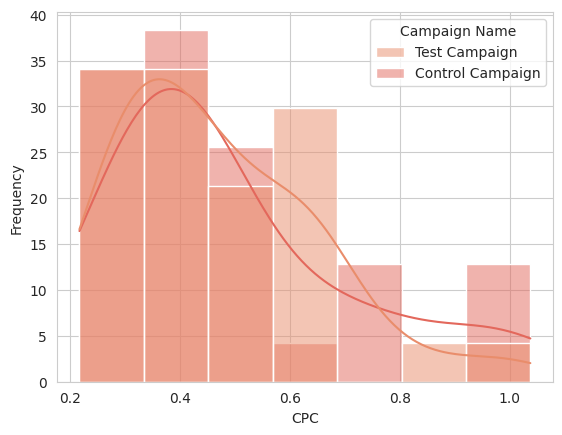

In [ ]:
sns.histplot(ab_change, x='CPC', hue = 'Campaign Name', stat='frequency', kde = True)

In [ ]:
res, p_val = stats.shapiro(ab_change['CPC'])
print(res, '\t', p_val)

if p_val < 0.05:
    print("существует статистически значимое доказательство против нулевой гипотезы. То есть, есть основания отвергнуть предположение о том, что данные имеют нормальное распределение.")
else:
    print("нет статистически значимых доказательств против нулевой гипотезы. В этом случае нельзя отвергнуть предположение о нормальном распределении данных.")

0.8914342522621155 	 6.50311922072433e-05
существует статистически значимое доказательство против нулевой гипотезы. То есть, есть основания отвергнуть предположение о том, что данные имеют нормальное распределение.


In [ ]:
statistic, p_value = mannwhitneyu(ab_change['CPC'].loc[ab_change['Campaign Name'] == 'Control Campaign'], ab_change['CPC'].loc[ab_change['Campaign Name'] == 'Test Campaign'])
print("Статистика U =", statistic)
print("p-значение =", p_value)
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: есть статистически значимая разница между группами.")
else:
    print("Не отвергаем нулевую гипотезу: нет статистически значимой разницы между группами.")

Статистика U = 461.0
p-значение = 0.8766349003139949
Не отвергаем нулевую гипотезу: нет статистически значимой разницы между группами.


<Axes: xlabel='CPC_log', ylabel='Frequency'>

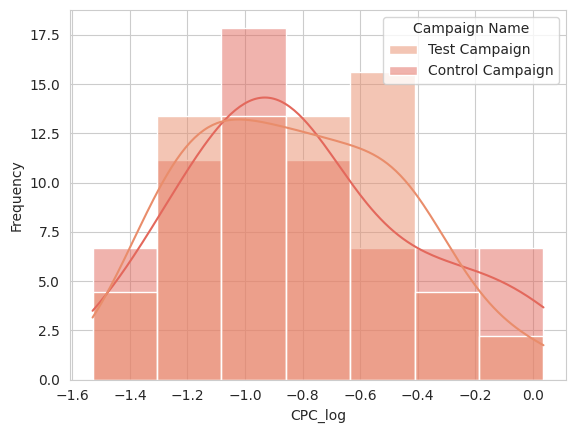

In [ ]:
ab_change['CPC_log'] = ab_change['CPC'].apply(lambda x: np.log(x))
sns.histplot(ab_change, x='CPC_log', hue = 'Campaign Name', stat='frequency', kde = True)

In [ ]:
t_stat, p_value = stats.ttest_ind(ab_change['CPC_log'].loc[ab_change['Campaign Name'] == 'Control Campaign'], ab_change['CPC_log'].loc[ab_change['Campaign Name'] == 'Test Campaign'])
print("p value : {}".format(p_value))

if p_value < 0.05:
    print("Тестовая группа превосходит по значению средних Контрольную группу")
    print("Существуют значительные различия чтобы отвергнуть нулевую гипотезу")
else:
    print("Существенной разницы между тестовой и контрольной группами нет. Нельзя отвергнуть нулевую гипотезу")

p value : 0.8079836749176897
Существенной разницы между тестовой и контрольной группами нет. Нельзя отвергнуть нулевую гипотезу


In [ ]:
statistic, p_value = mannwhitneyu(ab_change['Purchases'].loc[ab_change['Campaign Name'] == 'Control Campaign'], ab_change['Purchases'].loc[ab_change['Campaign Name'] == 'Test Campaign'])
print("Статистика U =", statistic)
print("p-значение =", p_value)
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: есть статистически значимая разница между группами.")
else:
    print("Не отвергаем нулевую гипотезу: нет статистически значимой разницы между группами.")

Статистика U = 455.0
p-значение = 0.9469515266277105
Не отвергаем нулевую гипотезу: нет статистически значимой разницы между группами.


In [ ]:
t_stat, p_value = stats.ttest_ind(ab_change['Purchases'].loc[ab_change['Campaign Name'] == 'Control Campaign'], ab_change['Purchases'].loc[ab_change['Campaign Name'] == 'Test Campaign'])
print("p value : {}".format(p_value))

if p_value < 0.05:
    print("Тестовая группа превосходит по значению средних Контрольную группу")
    print("Существуют значительные различия чтобы отвергнуть нулевую гипотезу")
else:
    print("Существенной разницы между тестовой и контрольной группами нет. Нельзя отвергнуть нулевую гипотезу")

p value : 0.9756387309702421
Существенной разницы между тестовой и контрольной группами нет. Нельзя отвергнуть нулевую гипотезу
